# Importing Libraries/Dataset

In [1]:
## Importing the required libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import keras
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix

from  tensorflow.keras import regularizers
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split

import time
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [2]:
## Loading the dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Assiging the class names.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


# Data Visualization and augmentation

Plotting 2 samples from each class of the dataset
T-shirt/top


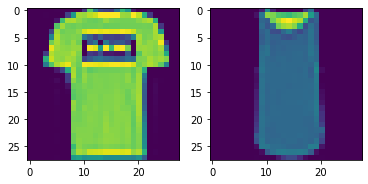

Trouser


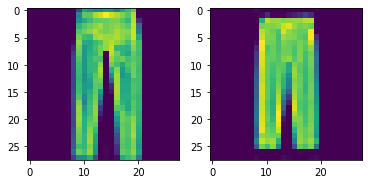

Pullover


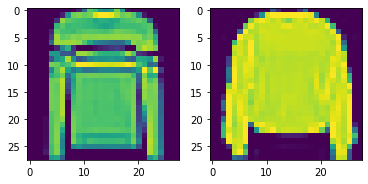

Dress


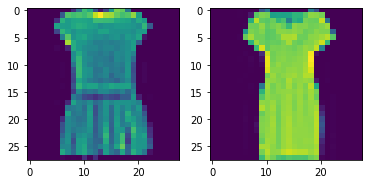

Coat


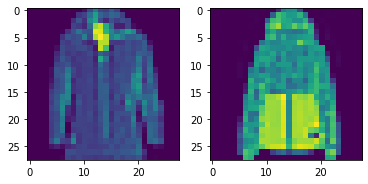

Sandal


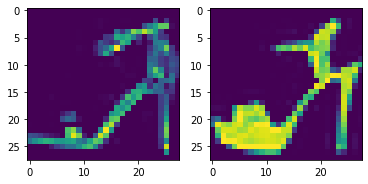

Shirt


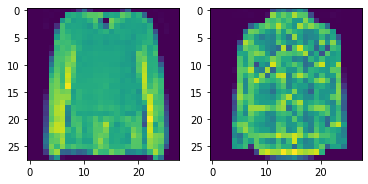

Sneaker


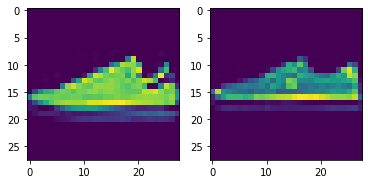

Bag


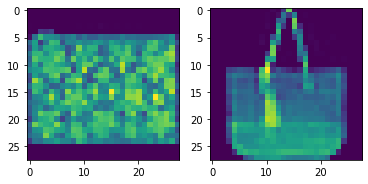

Ankle boot


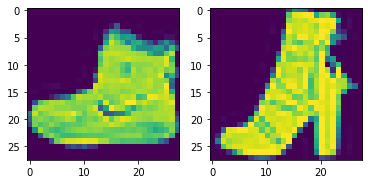

In [3]:
# Plotting 2 samples from each class of the dataset
def plot_images(labels, train_data_y, train_data_x, count):
  for lb in range(len(labels)):
    count = 0
    for inx in range(len(train_data_y)):
      if train_data_y[inx] == lb :
        count = count + 1
        plt.subplot(1,2,count)
        plt.imshow(train_data_x[inx])
        if count == 2:
          print (labels[train_data_y[inx]])
          plt.show()
          break

print("Plotting 2 samples from each class of the dataset")
count = 2
plot_images( class_names, train_labels, train_images , count )

Plotting 2 samples from each class of the dataset
T-shirt/top


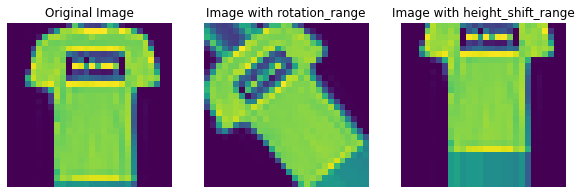

Trouser


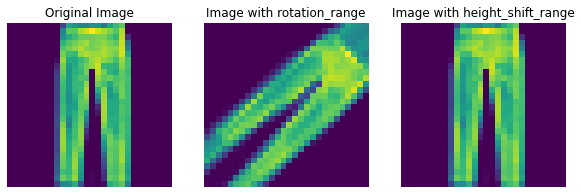

Pullover


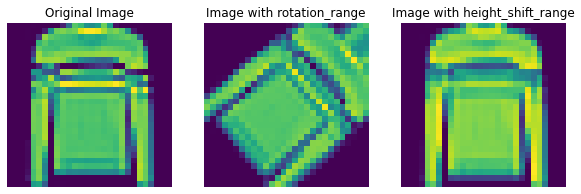

Dress


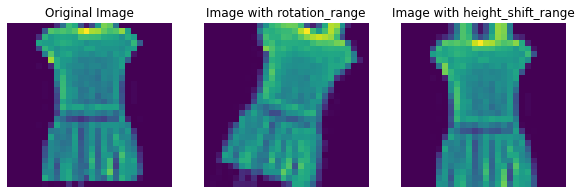

Coat


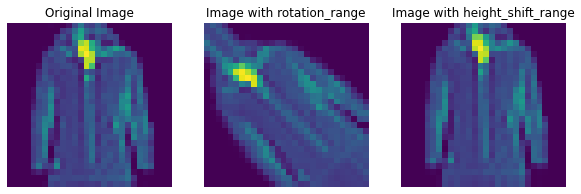

Sandal


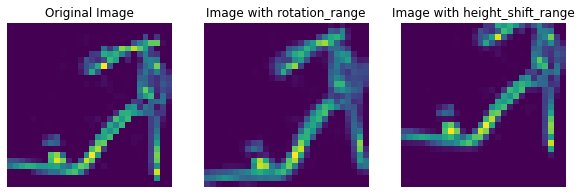

Shirt


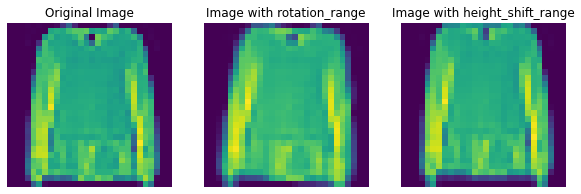

Sneaker


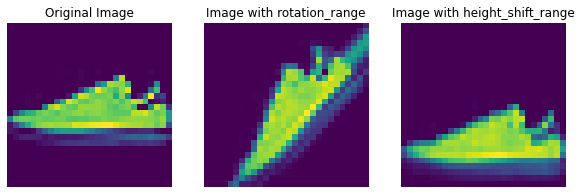

Bag


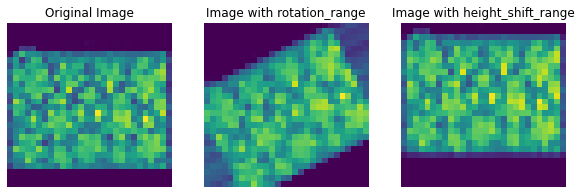

Ankle boot


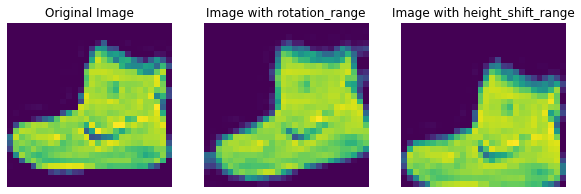

In [4]:
# Printing the Original, Range rotated and height shift range adjusted images from each class
datagen_rr = ImageDataGenerator(rotation_range=60)
datagen_hsr = ImageDataGenerator(height_shift_range=0.2)

def get_datagen_rr_hsr_images(img):
  x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
  x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
  for batch_rr in datagen_rr.flow(x, batch_size=1):
    rr_image = batch_rr[0].reshape(28, 28)
    break
  for batch_hsr in datagen_hsr.flow(x, batch_size=1):
    hsr_image = batch_hsr[0].reshape(28, 28)
    break
  return rr_image, hsr_image

def plot_images(labels, train_data_y, train_data_x, count):
  for lb in range(len(labels)):
    for inx in range(len(train_data_y)):
      if train_data_y[inx] == lb :
        plt.figure(figsize=(10, 7))
        plt.subplot(1,3,1)
        plt.imshow(train_data_x[inx])
        plt.axis('off')
        plt.title("Original Image")
        rr_image, hsr_image = get_datagen_rr_hsr_images(train_data_x[inx])
        plt.subplot(1,3,2)
        plt.imshow(rr_image)
        plt.axis('off')
        plt.title("Image with rotation_range")
        plt.subplot(1,3,3)
        plt.imshow(hsr_image)
        plt.axis('off')
        plt.title("Image with height_shift_range")
        print (labels[train_data_y[inx]])
        plt.show()
        break


print("Plotting 2 samples from each class of the dataset")
count = 2
plot_images( class_names, train_labels, train_images , count )

In [5]:
# Bringing the train and test data in the required format.
# Normalizing the train and test  scale the values to a range of 0 to 1 of both data sets
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
# Printing shapes of train and test data
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


# Model Building

In [7]:
# Using "Sequential Model layers"
# Model-1 : Simple 3-hidden layer neural network with L2 Regularization
model_1_withL2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(64, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
# Printing the model summary
model_1_withL2.summary()

### best number for hidden units and give reasons - PENDING
### dropout at the appropriate position and give reasons - PENDING

# Model-2 : Simple 2-hidden layer neural network
model_2_2hl_withDO = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(64, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
# Printing the model summary
model_2_2hl_withDO.summary()

# Model-3 : Simple 3-hidden layer neural network without L2 Regularization
model_3_withoutL2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
# Printing the model summary
model_3_withoutL2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
__________________________________________________

# Model Compilation

Compiling the Model with "sparse_categorical_crossentropy" loss function, using "Adam" optimizer with learning rate '0.001' and "accuracy" as  the metric.

With learning rates 0.1 , 0.01 , the loss values were heavy and the accuracy of the network are very low, compared to the learning rate 0.001.Hence choosing 0.001 as the learnig rate.

In [8]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Compiling Model 1
model_1_withL2.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)

# Compiling Model 2 ( Dropout to reduce the hidden units at each hidden layer)
model_2_2hl_withDO.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)

# Compiling Model 3
model_3_withoutL2.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)

# Model Training

In [9]:
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [10]:
def plot_loss_acc_graph(history):

  metrics = ['loss', 'accuracy']
  for metric in metrics:
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

### Training Model 1 - With L2 Regularization

Epoch 1/10
1600/1600 [==============================] - 22s 5ms/step - loss: 1.1109 - accuracy: 0.7464 - val_loss: 0.6357 - val_accuracy: 0.8462
Epoch 2/10
1600/1600 [==============================] - 7s 4ms/step - loss: 0.6473 - accuracy: 0.8313 - val_loss: 0.5846 - val_accuracy: 0.8414
Epoch 3/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.5801 - accuracy: 0.8407 - val_loss: 0.5446 - val_accuracy: 0.8508
Epoch 4/10
1600/1600 [==============================] - 7s 4ms/step - loss: 0.5590 - accuracy: 0.8433 - val_loss: 0.5360 - val_accuracy: 0.8492
Epoch 5/10
1600/1600 [==============================] - 7s 4ms/step - loss: 0.5412 - accuracy: 0.8470 - val_loss: 0.5292 - val_accuracy: 0.8516
Epoch 6/10
1600/1600 [==============================] - 7s 4ms/step - loss: 0.5368 - accuracy: 0.8475 - val_loss: 0.5040 - val_accuracy: 0.8572
Epoch 7/10
1600/1600 [==============================] - 7s 4ms/step - loss: 0.5320 - accuracy: 0.8496 - val_loss: 0.4876 - val_accuracy

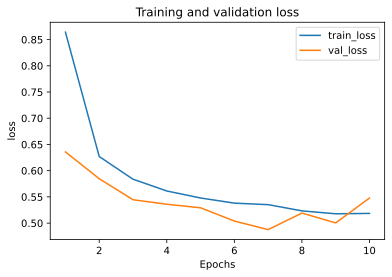

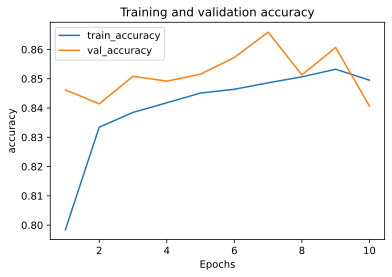

Total Time taken for Training 'model_1_withL2' model :  81.78169536590576


In [11]:
total_timetaken = []
time_callback = TimeHistory()

history = model_1_withL2.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=30, callbacks=[time_callback])
total_timetaken.append(time_callback.times)
print(' ')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
model_1_history = history
# Plotting loss and accuracy history graphs for both train and validation set
plot_loss_acc_graph(model_1_history)
print("Total Time taken for Training 'model_1_withL2' model : ", sum(total_timetaken[0]))

### Training Model 2 - Reduced hidden layer and dropout to reduce the number of hidden units

Epoch 1/10
1600/1600 [==============================] - 6s 3ms/step - loss: 0.9361 - accuracy: 0.7291 - val_loss: 0.5512 - val_accuracy: 0.8392
Epoch 2/10
1600/1600 [==============================] - 4s 3ms/step - loss: 0.5854 - accuracy: 0.8286 - val_loss: 0.5145 - val_accuracy: 0.8496
Epoch 3/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.5575 - accuracy: 0.8345 - val_loss: 0.5002 - val_accuracy: 0.8562
Epoch 4/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.5335 - accuracy: 0.8418 - val_loss: 0.4974 - val_accuracy: 0.8541
Epoch 5/10
1600/1600 [==============================] - 4s 3ms/step - loss: 0.5283 - accuracy: 0.8409 - val_loss: 0.4808 - val_accuracy: 0.8583
Epoch 6/10
1600/1600 [==============================] - 4s 3ms/step - loss: 0.5268 - accuracy: 0.8461 - val_loss: 0.4803 - val_accuracy: 0.8554
Epoch 7/10
1600/1600 [==============================] - 4s 3ms/step - loss: 0.5150 - accuracy: 0.8452 - val_loss: 0.4810 - val_accuracy:

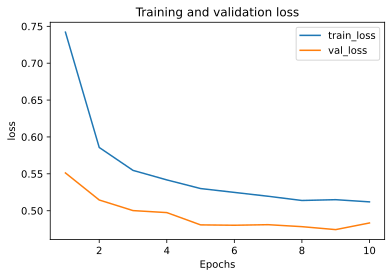

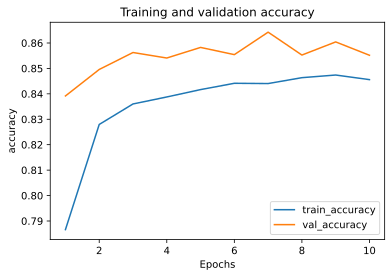

Total Time taken for Training 'model_2_2hl_withDO' model :  45.50321674346924


In [12]:

total_timetaken = []
time_callback = TimeHistory()

history = model_2_2hl_withDO.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=30, callbacks=[time_callback])
total_timetaken.append(time_callback.times)
print(' ')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
model_2_history = history
# Plotting loss and accuracy history graphs for both train and validation set
plot_loss_acc_graph(model_2_history)
print("Total Time taken for Training 'model_2_2hl_withDO' model : ", sum(total_timetaken[0]))

### Training Model 3 - Without L2 Regularization

Epoch 1/10
1600/1600 [==============================] - 6s 3ms/step - loss: 0.6776 - accuracy: 0.7450 - val_loss: 0.4183 - val_accuracy: 0.8446
Epoch 2/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4127 - accuracy: 0.8488 - val_loss: 0.4126 - val_accuracy: 0.8512
Epoch 3/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.3761 - accuracy: 0.8638 - val_loss: 0.3675 - val_accuracy: 0.8683
Epoch 4/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.3538 - accuracy: 0.8695 - val_loss: 0.3459 - val_accuracy: 0.8756
Epoch 5/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.3338 - accuracy: 0.8764 - val_loss: 0.3546 - val_accuracy: 0.8685
Epoch 6/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.3226 - accuracy: 0.8815 - val_loss: 0.3405 - val_accuracy: 0.8752
Epoch 7/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.3151 - accuracy: 0.8818 - val_loss: 0.3296 - val_accuracy:

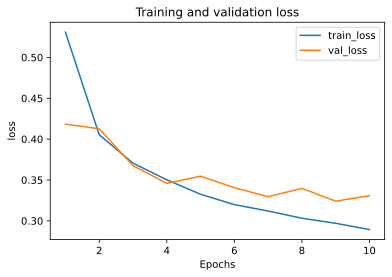

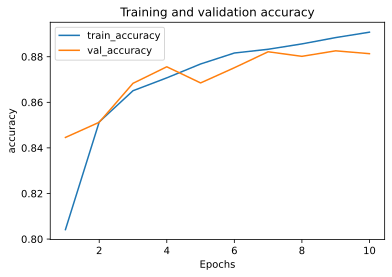

Total Time taken for Training 'model_3_withoutL2' model :  54.85804796218872


In [13]:

total_timetaken = []
time_callback = TimeHistory()

history = model_3_withoutL2.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=30, callbacks=[time_callback])
total_timetaken.append(time_callback.times)
print(' ')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
model_3_history = history
# Plotting loss and accuracy history graphs for both train and validation set
plot_loss_acc_graph(model_3_history)
print("Total Time taken for Training 'model_3_withoutL2' model : ", sum(total_timetaken[0]))

# Model Evaluation

In [14]:
# Evaluating the Models
test_loss, test_acc = model_1_withL2.evaluate(test_images, test_labels)
test_loss, test_acc = model_2_2hl_withDO.evaluate(test_images, test_labels)
test_loss, test_acc = model_3_withoutL2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3528 - accuracy: 0.8767


In [15]:
print("Final train and validation loss and accuracy for the Model 1")
print("Final Training Loss : " , model_1_history.history['loss'][-1])
print("Final Training Accuracy : ", model_1_history.history['accuracy'][-1])
print("Final Validation Loss : ", model_1_history.history['val_loss'][-1])
print("Final Validation Accuracy : ", model_1_history.history['val_accuracy'][-1])

print(' ')
print("Final train and validation loss and accuracy for the Model 2")
print("Final Training Loss : " , model_2_history.history['loss'][-1])
print("Final Training Accuracy : ", model_2_history.history['accuracy'][-1])
print("Final Validation Loss : ", model_2_history.history['val_loss'][-1])
print("Final Validation Accuracy : ", model_2_history.history['val_accuracy'][-1])

print(' ')
print("Final train and validation loss and accuracy for the Model 2")
print("Final Training Loss : " , model_3_history.history['loss'][-1])
print("Final Training Accuracy : ", model_3_history.history['accuracy'][-1])
print("Final Validation Loss : ", model_3_history.history['val_loss'][-1])
print("Final Validation Accuracy : ", model_3_history.history['val_accuracy'][-1])

Final train and validation loss and accuracy for the Model 1
Final Training Loss :  0.5184935927391052
Final Training Accuracy :  0.8495000004768372
Final Validation Loss :  0.547799289226532
Final Validation Accuracy :  0.840666651725769
 
Final train and validation loss and accuracy for the Model 2
Final Training Loss :  0.5119791030883789
Final Training Accuracy :  0.8455833196640015
Final Validation Loss :  0.4833635985851288
Final Validation Accuracy :  0.8551666736602783
 
Final train and validation loss and accuracy for the Model 2
Final Training Loss :  0.28927454352378845
Final Training Accuracy :  0.8907708525657654
Final Validation Loss :  0.3307708203792572
Final Validation Accuracy :  0.8813333511352539


In [16]:
# Predicting for test data

# Model 1
predictions_m1 = model_1_withL2.predict_classes(test_images)
y_label = np.array(test_labels)
predictions_classes_m1 = np.array(predictions_m1)

# Model 2
predictions_m2 = model_2_2hl_withDO.predict_classes(test_images)
y_label = np.array(test_labels)
predictions_classes_m2 = np.array(predictions_m2)

# Model 3
predictions_m3 = model_3_withoutL2.predict_classes(test_images)
y_label = np.array(test_labels)
predictions_classes_m3 = np.array(predictions_m3)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [17]:
def plot_confusion_matrix(data, labels):
    
    sns.set(color_codes=True)
    plt.figure(1, figsize=(10, 9))
    plt.title("Confusion Matrix")
    sns.set(font_scale=1)
    ax = sns.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'}, fmt='d')
    ax.set_xticklabels(labels, fontsize=8, rotation=45)
    ax.set_yticklabels(labels, fontsize=8, rotation=45)
    ax.set(ylabel="True Label", xlabel="Predicted Label")
    plt.show()

Confusion Matrix for Model 1


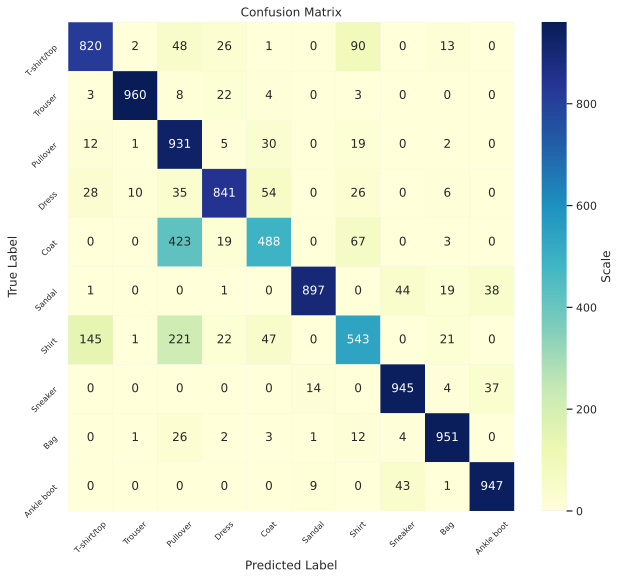

 
Classification report for Model 1
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.82      0.82      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.55      0.93      0.69      1000
       Dress       0.90      0.84      0.87      1000
        Coat       0.78      0.49      0.60      1000
      Sandal       0.97      0.90      0.93      1000
       Shirt       0.71      0.54      0.62      1000
     Sneaker       0.91      0.94      0.93      1000
         Bag       0.93      0.95      0.94      1000
  Ankle boot       0.93      0.95      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.85      0.83      0.83     10000
weighted avg       0.85      0.83      0.83     10000

--------------------------------------------------------------------- 
Confusion Matrix for Model 2


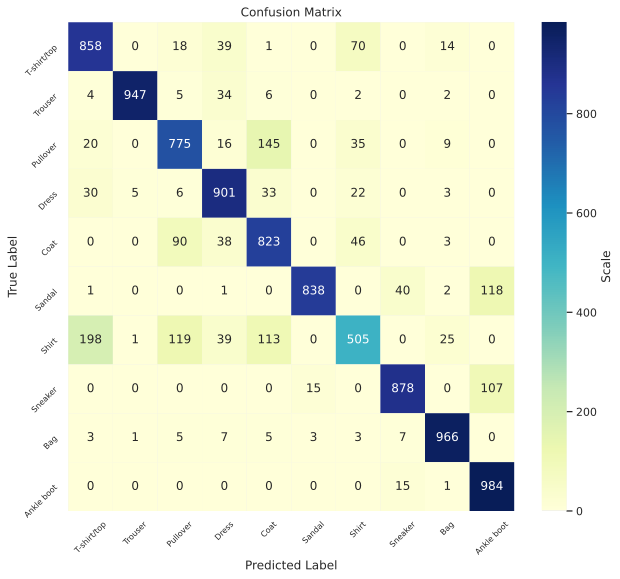

 
Classification report for Model 2
              precision    recall  f1-score   support

 T-shirt/top       0.77      0.86      0.81      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.76      0.78      0.77      1000
       Dress       0.84      0.90      0.87      1000
        Coat       0.73      0.82      0.77      1000
      Sandal       0.98      0.84      0.90      1000
       Shirt       0.74      0.51      0.60      1000
     Sneaker       0.93      0.88      0.91      1000
         Bag       0.94      0.97      0.95      1000
  Ankle boot       0.81      0.98      0.89      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000

--------------------------------------------------------------------- 
Confusion Matrix for Model 3


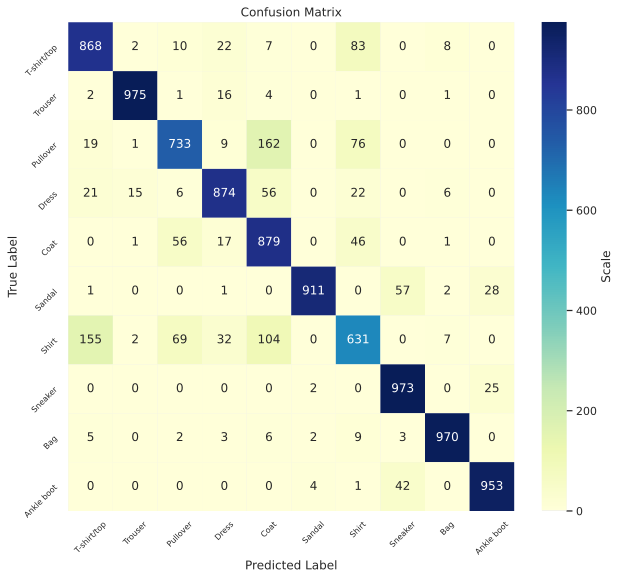

Classification report for Model 3
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.87      0.84      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.84      0.73      0.78      1000
       Dress       0.90      0.87      0.89      1000
        Coat       0.72      0.88      0.79      1000
      Sandal       0.99      0.91      0.95      1000
       Shirt       0.73      0.63      0.68      1000
     Sneaker       0.91      0.97      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [18]:
# Plotting the Confusion matrices and Classification reports
print("Confusion Matrix for Model 1")
c_mat_1 = confusion_matrix(y_label, predictions_classes_m1)
plot_confusion_matrix(c_mat_1, class_names)
print(' ')
print("Classification report for Model 1")
cr1 = classification_report(test_labels, predictions_m1, target_names=class_names)
print(cr1)
print('--------------------------------------------------------------------- ')
print("Confusion Matrix for Model 2")
c_mat_2 = confusion_matrix(y_label, predictions_classes_m2)
plot_confusion_matrix(c_mat_2, class_names)
print(' ')
print("Classification report for Model 2")
cr2 = classification_report(test_labels, predictions_m2, target_names=class_names)
print(cr2)
print('--------------------------------------------------------------------- ')
print("Confusion Matrix for Model 3")
c_mat_3 = confusion_matrix(y_label, predictions_classes_m3)
plot_confusion_matrix(c_mat_3, class_names)
print("Classification report for Model 3")
cr3 = classification_report(test_labels, predictions_m3, target_names=class_names)
print(cr3)

Plotting the two most incorrectly classified images for each class in the test dataset


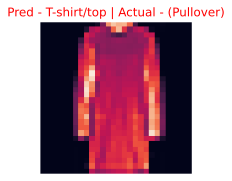

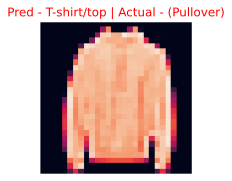

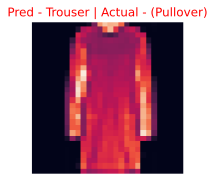

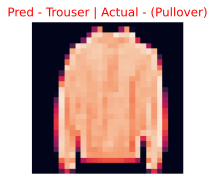

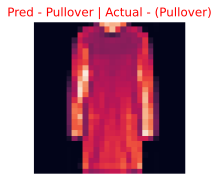

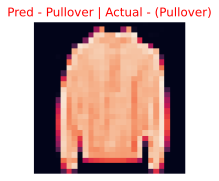

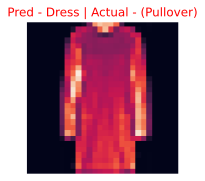

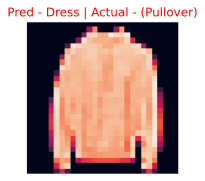

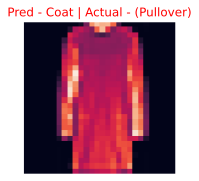

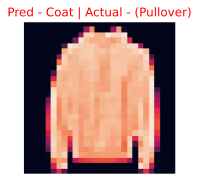

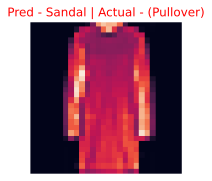

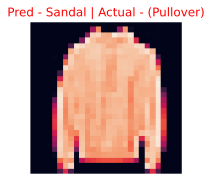

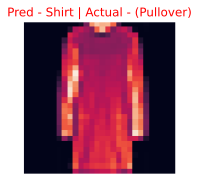

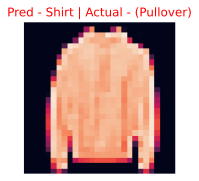

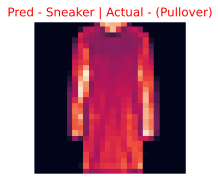

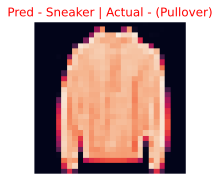

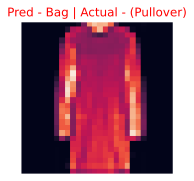

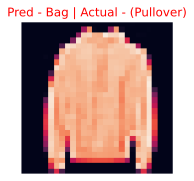

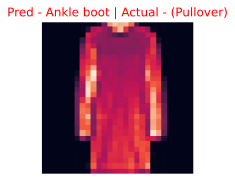

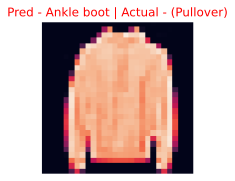

Plotting the two most incorrectly classified images for each class in the test dataset


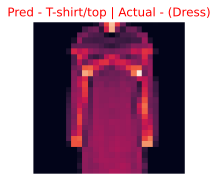

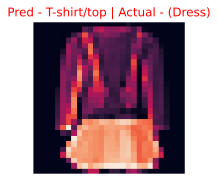

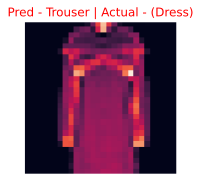

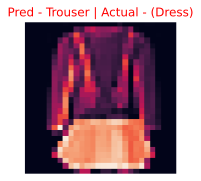

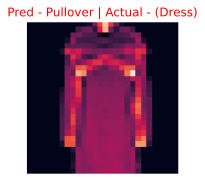

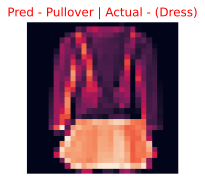

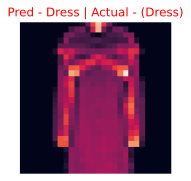

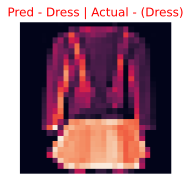

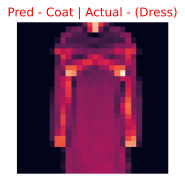

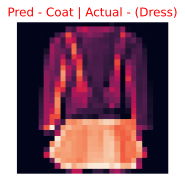

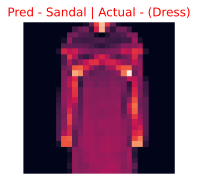

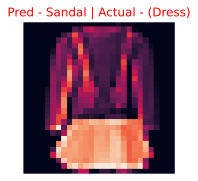

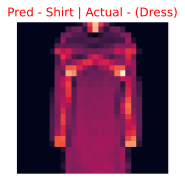

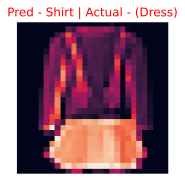

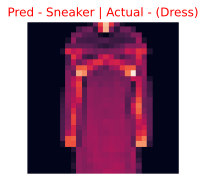

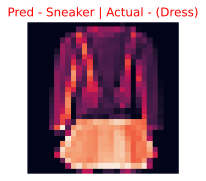

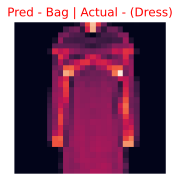

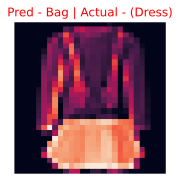

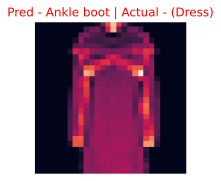

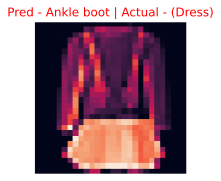

Plotting the two most incorrectly classified images for each class in the test dataset


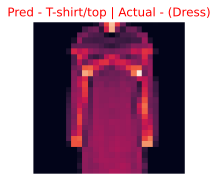

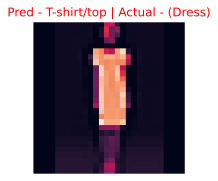

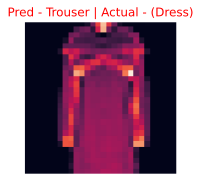

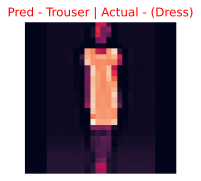

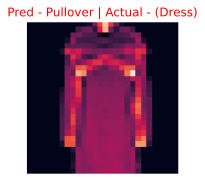

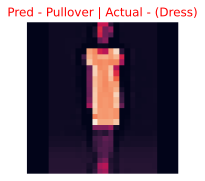

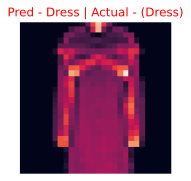

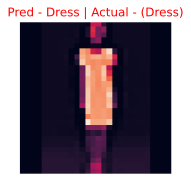

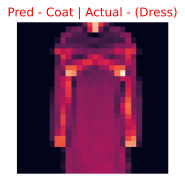

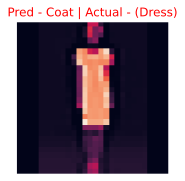

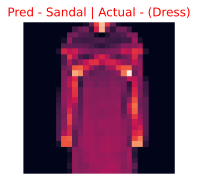

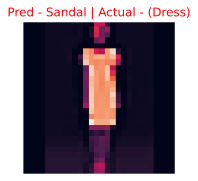

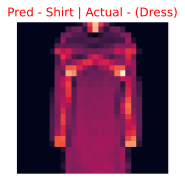

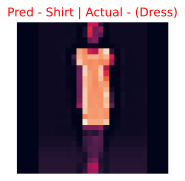

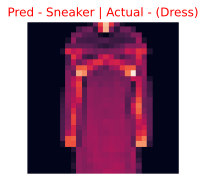

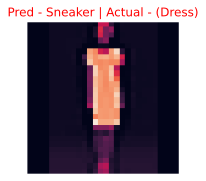

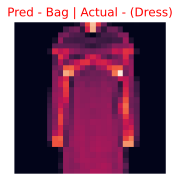

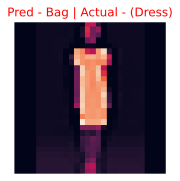

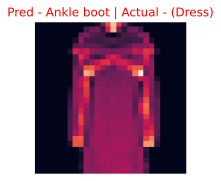

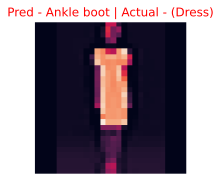

In [19]:
# Plotting two most incorrectly classified images for each class in the test dataset.
def makediagonalzero(mat, n, m):
 
    for i in range(n):
        for j in range(m):
 
            # right and left diagonal condition
            if (i == j or (i + j + 1) == n):
                mat[i][j] = 0
    return mat

def plot_misclass_image(mis_pred_class, testlabels, predictions_res, row_ctr):

  for iv in mis_pred_class:
    i = 0
    count = 0
    test_indices = [index for index, element in enumerate(testlabels) if element == iv]
    pred_indiced = [index for index, element in enumerate(predictions_res) if element == iv]
    unique_indexes = set(test_indices) - set(pred_indiced)
    for index in unique_indexes:
      predict_index = np.array(predictions_res[index])
      true_index = np.array(testlabels[index])
      i = i + 1
      if true_index != predict_index:
        ax = plt.subplot(1,2,i)
        plt.imshow(np.squeeze(test_images[index]))
        plt.axis('off')
        ax.set_title("Pred - {} | Actual - ({})".format(class_names[row_ctr], 
                                  class_names[iv]),
                                  color=("green" if predict_index == true_index else "red"))
        plt.show()
        if i == 2:
          break
    break      

def misclass_images(mat_for_image_plt, predictions_m):
  
  N = 2
  row_ctr = 0
  for row in mat_for_image_plt:
    res = sorted(range(len(row)), key = lambda sub: row[sub])[-N:]
    for lb in range(len(class_names)):
      if lb == row_ctr and row_ctr < 10:
        row_ctr = row_ctr + 1
        plot_misclass_image(res, test_labels, predictions_m, lb)
      else:
        break

n = 10 #len(c_mat_1)
m = 10 #len(c_mat_1[0])
mat_for_image_plt_1 = makediagonalzero(c_mat_1, n, m)
mat_for_image_plt_2 = makediagonalzero(c_mat_2, n, m)
mat_for_image_plt_3 = makediagonalzero(c_mat_3, n, m)
image_mat = [mat_for_image_plt_1, mat_for_image_plt_2, mat_for_image_plt_3]
predictions = [predictions_m1, predictions_m2, predictions_m3]
for mat_for_image, predictions in zip(image_mat, predictions):
  print("Plotting the two most incorrectly classified images for each class in the test dataset")
  misclass_images(mat_for_image, predictions)

Comparing  
1) "model_1_withL2 :  L2 Regularization".
2) "model_2_2hl_withDO : With 2 hidden layers and Dropout at both the hidden layers.
3) "model_3_withoutL2 : Without L2 Regularization"

When we are training the model in keras, accuracy and loss for validation data could be variating with different cases. Usually with every epoch increasing, loss should be going lower and accuracy should be going higher.


model_1_withL2 
- Total Time taken for Training 'model_1_withL2' model :  83.56662058830261 secs
- The Training & Validation plot for loss and accuracy shows the decreasing loss and increasing accuracy with respect to number of epochs
- Final accuracy on test data is 86.12%

model_2_2hl_withDO
- Total Time taken for Training 'model_2_2hl_withDO' model :  54.82388186454773 secs
- The Training & Validation plot for loss and accuracy shows the decreasing loss and increasing accuracy with respect to number of epochs.
- Accuracy on test data is 85.96%

model_3_withoutL2
- Total Time taken for Training 'model_3_withoutL2' model :  66.66418600082397 secs
- The Training & Validation plot for loss and accuracy shows the decreasing loss and increasing accuracy with respect to number of epochs.
- Accuracy on test data is 88.32%